## Яндекс Недвижимость

В нашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений за несколько лет о продаже квартир в Санкт-Петербурге и соседних населённых пунктах.
Задача — выполнить предобработку данных и изучить их, чтобы найти интересные особенности и зависимости, которые существуют на рынке недвижимости.
О каждой квартире в базе содержится два типа данных: добавленные пользователем и картографические. Например, к первому типу относятся площадь квартиры, её этаж и количество балконов, ко второму — расстояния до центра города, аэропорта и ближайшего парка. 

### Описание данных

    airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
    balcony — число балконов
    ceiling_height — высота потолков (м)
    cityCenters_nearest — расстояние до центра города (м)
    days_exposition — сколько дней было размещено объявление (от публикации до снятия)
    first_day_exposition — дата публикации
    floor — этаж
    floors_total — всего этажей в доме
    is_apartment — апартаменты (булев тип)
    kitchen_area — площадь кухни в квадратных метрах (м²)
    last_price — цена на момент снятия с публикации
    living_area — жилая площадь в квадратных метрах (м²)
    locality_name — название населённого пункта
    open_plan — свободная планировка (булев тип)
    parks_around3000 — число парков в радиусе 3 км
    parks_nearest — расстояние до ближайшего парка (м)
    ponds_around3000 — число водоёмов в радиусе 3 км
    ponds_nearest — расстояние до ближайшего водоёма (м)
    rooms — число комнат
    studio — квартира-студия (булев тип)
    total_area — общая площадь квартиры в квадратных метрах (м²)
    total_images — число фотографий квартиры в объявлении

### Импортируем библиотеки

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np


In [2]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

###  Обзор данных

#### Загружаем данные

In [3]:
try:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')

In [4]:
data.head() #Выведем первые 5 строк

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.000,108.000,2019-03-07T00:00:00,3,2.700,16.000,51.000,8,NaN,...,25.000,NaN,Санкт-Петербург,18863.000,16028.000,1.000,482.000,2.000,755.000,NaN
1,7,3350000.000,40.400,2018-12-04T00:00:00,1,NaN,11.000,18.600,1,NaN,...,11.000,2.000,посёлок Шушары,12817.000,18603.000,0.000,NaN,0.000,NaN,81.000
2,10,5196000.000,56.000,2015-08-20T00:00:00,2,NaN,5.000,34.300,4,NaN,...,8.300,0.000,Санкт-Петербург,21741.000,13933.000,1.000,90.000,2.000,574.000,558.000
3,0,64900000.000,159.000,2015-07-24T00:00:00,3,NaN,14.000,NaN,9,NaN,...,NaN,0.000,Санкт-Петербург,28098.000,6800.000,2.000,84.000,3.000,234.000,424.000
4,2,10000000.000,100.000,2018-06-19T00:00:00,2,3.030,14.000,32.000,13,NaN,...,41.000,NaN,Санкт-Петербург,31856.000,8098.000,2.000,112.000,1.000,48.000,121.000


#### Получаем информацию

In [5]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [6]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000,23699.000,23699.000,23699.000,14504.000,23613.000,21796.000,23699.000,21421.000,12180.000,18157.000,18180.000,18181.000,8079.000,18181.000,9110.000,20518.000
mean,9.858,6541548.772,60.349,2.071,2.771,10.674,34.458,5.892,10.570,1.150,28793.672,14191.278,0.611,490.805,0.770,517.981,180.889
std,5.683,10887013.268,35.654,1.078,1.261,6.597,22.030,4.885,5.905,1.071,12630.881,8608.386,0.802,342.318,0.938,277.721,219.728
min,0.000,12190.000,12.000,0.000,1.000,1.000,2.000,1.000,1.300,0.000,0.000,181.000,0.000,1.000,0.000,13.000,1.000
25%,6.000,3400000.000,40.000,1.000,2.520,5.000,18.600,2.000,7.000,0.000,18585.000,9238.000,0.000,288.000,0.000,294.000,45.000
50%,9.000,4650000.000,52.000,2.000,2.650,9.000,30.000,4.000,9.100,1.000,26726.000,13098.500,0.000,455.000,1.000,502.000,95.000
75%,14.000,6800000.000,69.900,3.000,2.800,16.000,42.300,8.000,12.000,2.000,37273.000,16293.000,1.000,612.000,1.000,729.000,232.000
max,50.000,763000000.000,900.000,19.000,100.000,60.000,409.700,33.000,112.000,5.000,84869.000,65968.000,3.000,3190.000,3.000,1344.000,1580.000


#### Построим гистограмму

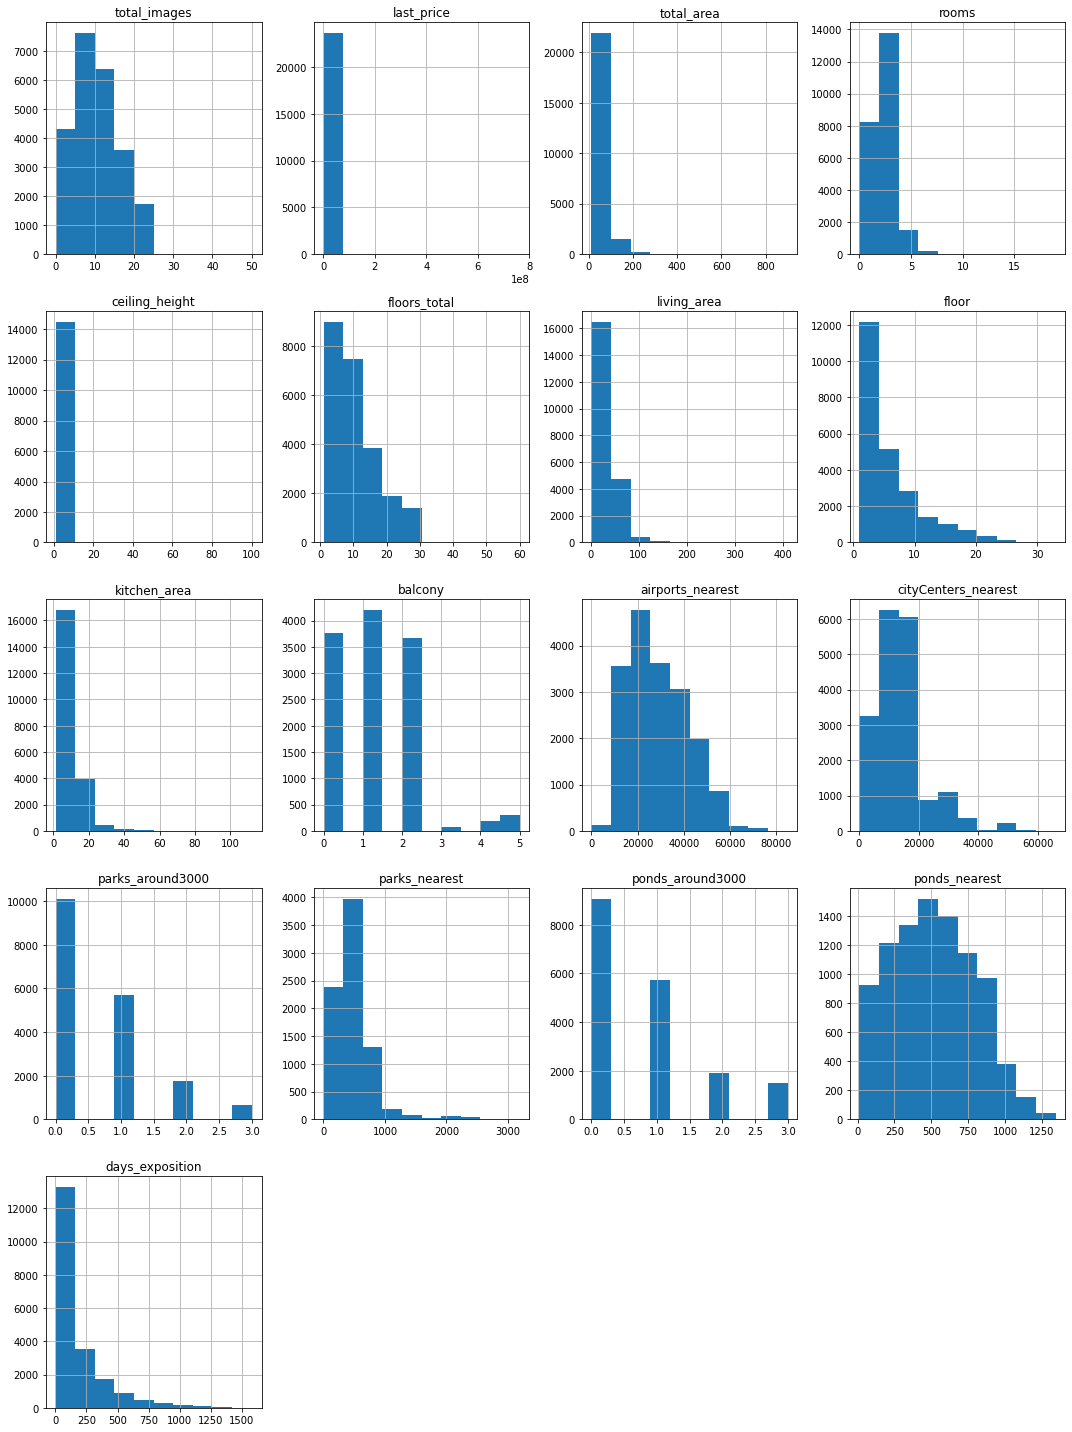

In [7]:
data.hist(figsize=(15, 20))
plt.tight_layout() # убираем служебную информацию

In [8]:
data.duplicated().sum()# проверка явных дубликатов

0

**Выводы:**

- Следует заполнить пропуски в высоте потолков,площадях и этажах зданий
- Стоит проверить количественные показатели на аномалии и выбросы. 
- Изменить типы данных у полей first_day_exposition и is_apartment так, как их типы отличаются от заявленых в документации
- Явных дубликатов не обнаружено,но стоит проверить на них locality_name и заполнить в этом поле пропуски

#### Описание данных

    airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
    balcony — число балконов
    ceiling_height — высота потолков (м)
    cityCenters_nearest — расстояние до центра города (м)
    days_exposition — сколько дней было размещено объявление (от публикации до снятия)
    first_day_exposition — дата публикации
    floor — этаж
    floors_total — всего этажей в доме
    is_apartment — апартаменты (булев тип)
    kitchen_area — площадь кухни в квадратных метрах (м²)
    last_price — цена на момент снятия с публикации
    living_area — жилая площадь в квадратных метрах (м²)
    locality_name — название населённого пункта
    open_plan — свободная планировка (булев тип)
    parks_around3000 — число парков в радиусе 3 км
    parks_nearest — расстояние до ближайшего парка (м)
    ponds_around3000 — число водоёмов в радиусе 3 км
    ponds_nearest — расстояние до ближайшего водоёма (м)
    rooms — число комнат
    studio — квартира-студия (булев тип)
    total_area — общая площадь квартиры в квадратных метрах (м²)
    total_images — число фотографий квартиры в объявлении

### Предобработка данных

#### Стиль загаловков

In [9]:
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

Приведем колонки cityCenters_nearest, ponds_around3000 и parks_around3000 к snake_case

In [10]:
data = data.rename(columns={'parks_around3000' : 'parks_around_3000', 'ponds_around3000' : 'ponds_around_3000', 'cityCenters_nearest' : 'city_centers_nearest'})

In [11]:
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around_3000', 'parks_nearest', 'ponds_around_3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

#### Пропуски значений

In [12]:
data.isnull().sum() # подсчёт пропусков

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around_3000        5518
parks_nearest           15620
ponds_around_3000        5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

#### Процент пропусков


In [13]:
for col in data.columns:
    pct_missing = np.mean(data[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

total_images - 0%
last_price - 0%
total_area - 0%
first_day_exposition - 0%
rooms - 0%
ceiling_height - 39%
floors_total - 0%
living_area - 8%
floor - 0%
is_apartment - 88%
studio - 0%
open_plan - 0%
kitchen_area - 10%
balcony - 49%
locality_name - 0%
airports_nearest - 23%
city_centers_nearest - 23%
parks_around_3000 - 23%
parks_nearest - 66%
ponds_around_3000 - 23%
ponds_nearest - 62%
days_exposition - 13%


#### Возможные причины пропусков:

Большинство пропусков можно объяснить тем, что продавец незаполнил эти поля при заполнении анкеты объявления. Или ошибками софта геолокации

#### Заменяем пропуски в locality_name

In [14]:
data['locality_name'] = data['locality_name'].fillna('Не указано')

#### Заменяем пропуски в balcony

In [15]:
data['balcony'] = data['balcony'].fillna(0)

#### Заменяем пропуски в airports_nearest,  city_centers_nearest,   ceiling_height, parks_nearest, ponds_nearest, ceiling_height, parks_around_3000, ponds_around_3000

In [16]:
columns_to_replace = ['airports_nearest', 'city_centers_nearest', 'parks_nearest', 'ponds_nearest', 'parks_around_3000', 'ponds_around_3000', 'days_exposition' ]
for column in columns_to_replace:
    data[column] = data[column].fillna(data.groupby('locality_name')[column].transform('median'))

In [17]:
data.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name               0
airports_nearest         5386
city_centers_nearest     5386
parks_around_3000        5386
parks_nearest            5998
ponds_around_3000        5386
ponds_nearest            5494
days_exposition            80
dtype: int64

Как видно многие пропуски не удалось удалить. Возможно, сначала стоит проверить на дубликаты.

### Изменение типов данных

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23699 non-null  object 
 15  airports_nearest   

Необходимо изменить типы данных у следующих полей:

 `first_day_exposition - с object на date здесь хранится дата
 is_apartment - с object на bool в описании у этого столбца должен быть булевый тип`

In [19]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [20]:
data['is_apartment'] = data['is_apartment'].astype('bool').fillna(0) # заполним пропуски в этой колонке нулями

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

### Обработка дубликатов

In [22]:
data['locality_name'] = data['locality_name'].replace('ё', 'е', regex=True) # замним ё на е

In [23]:
# уберем лишнее из locality_name
strings_to_clean = ['поселок городского типа', 'городской поселок', 'коттеджный поселок', 'поселок при железнодорожной станции', 'поселок', 'деревня', 'садовое товарищество', 'село', 'станции', 'садоводческое некоммерческое товарищество']
for string in strings_to_clean:
    data['locality_name'] = data['locality_name'].replace(string, ' ', regex=True) 

In [24]:
data['locality_name'] = data['locality_name'].str.strip() # уберем лишние пробелы

#### Заполним пропуски в высоте потолков

In [25]:
data['ceiling_height'] = data['ceiling_height'].fillna(data.groupby('floors_total')['ceiling_height'].transform('median')) # медиана по этажности зданий

#### Заполним пропуски в жилой площади

In [26]:
data['living_area'] = data['living_area'].fillna(data.groupby('total_area')['living_area'].transform('median')) # медиана по общей площади

#### Заполним пропуски в площади кухни

In [27]:
data['kitchen_area'] = data['kitchen_area'].fillna(data.groupby('total_area')['kitchen_area'].transform('median')) # медиана по общей площади

#### Попробуем заполнить пропуски в airports_nearest city_centers_nearest parks_around_3000 parks_nearest ponds_around_3000 ponds_nearest 

In [28]:
columns_to_replace = ['airports_nearest', 'city_centers_nearest', 'parks_around_3000', 'parks_nearest', 'ponds_around_3000', 'ponds_nearest']
for column in columns_to_replace:
    data[column] = data[column].fillna(data.groupby('locality_name')[column].transform('mean')) # среднее а не медиана из-за небольшого количества объявлений

In [29]:
data.isnull().sum()

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height            78
floors_total              86
living_area              143
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area             205
balcony                    0
locality_name              0
airports_nearest        4829
city_centers_nearest    4829
parks_around_3000       4829
parks_nearest           5998
ponds_around_3000       4829
ponds_nearest           4938
days_exposition           80
dtype: int64

**Вывод**

Большинство пропусков в этих категориях заполнены, где это возможно.

### Обработка аномальных значений

#### Построим диаграму по 'ceiling_height'

<AxesSubplot:>

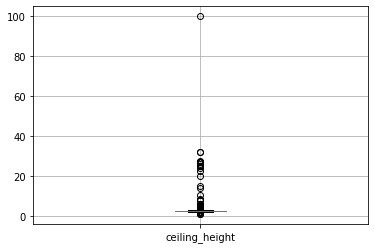

In [30]:
data.boxplot(column=['ceiling_height'])

In [31]:
data['ceiling_height'].describe()

count   23621.000
mean        2.736
std         0.996
min         1.000
25%         2.550
50%         2.650
75%         2.750
max       100.000
Name: ceiling_height, dtype: float64

In [32]:
data[data['ceiling_height'] > 10]['ceiling_height'].count()

26

In [33]:
(24 / 21759) * 100 #Меньше процента

0.11029918654349924

In [34]:
data = data.drop(data[data.ceiling_height > 10].index)

#### Построим диаграмы

<AxesSubplot:>

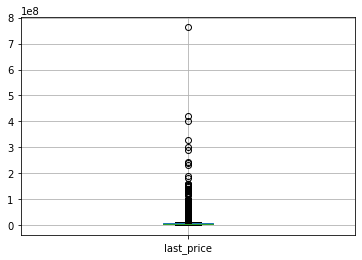

In [35]:
data.boxplot(column=['last_price'])

In [36]:
data['last_price'].describe()

count       23673.000
mean      6543286.670
std      10892468.920
min         12190.000
25%       3400000.000
50%       4650000.000
75%       6800000.000
max     763000000.000
Name: last_price, dtype: float64

In [37]:
data = data.drop(data[data.last_price ==  763000000.000].index)

<AxesSubplot:>

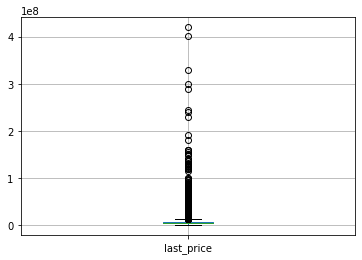

In [38]:
data.boxplot(column=['last_price'])

<AxesSubplot:>

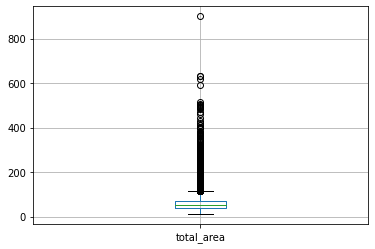

In [39]:
data.boxplot(column=['total_area'])

In [40]:
data['total_area'].describe()

count   23672.000
mean       60.342
std        35.599
min        12.000
25%        40.000
50%        52.000
75%        69.900
max       900.000
Name: total_area, dtype: float64

In [41]:
data[data['total_area'] > 100.000]['total_area'].count()

1835

In [42]:
#data = data.drop(data[data.total_area > 100.000].index)

In [43]:
data['total_area'].describe()

count   23672.000
mean       60.342
std        35.599
min        12.000
25%        40.000
50%        52.000
75%        69.900
max       900.000
Name: total_area, dtype: float64

In [44]:
data['rooms'].describe()

count   23672.000
mean        2.071
std         1.078
min         0.000
25%         1.000
50%         2.000
75%         3.000
max        19.000
Name: rooms, dtype: float64

<AxesSubplot:>

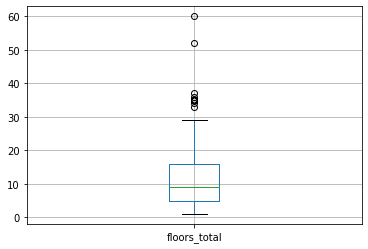

In [45]:
data.boxplot(column=['floors_total'])

In [46]:
data['floors_total'].describe()

count   23586.000
mean       10.674
std         6.593
min         1.000
25%         5.000
50%         9.000
75%        16.000
max        60.000
Name: floors_total, dtype: float64

In [47]:
#data = data.drop(data[data.floors_total > 30].index)

In [48]:
data[data['floors_total'] > 30]['floors_total'].count()

30

In [49]:
data['floors_total'].describe()

count   23586.000
mean       10.674
std         6.593
min         1.000
25%         5.000
50%         9.000
75%        16.000
max        60.000
Name: floors_total, dtype: float64

<AxesSubplot:>

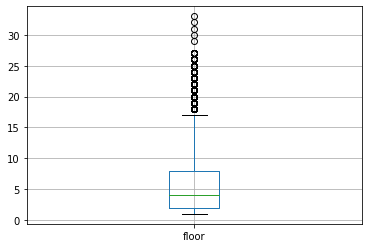

In [50]:
data.boxplot(column=['floor'])

In [51]:
data['floor'].describe()

count   23672.000
mean        5.891
std         4.883
min         1.000
25%         2.000
50%         4.000
75%         8.000
max        33.000
Name: floor, dtype: float64

<AxesSubplot:>

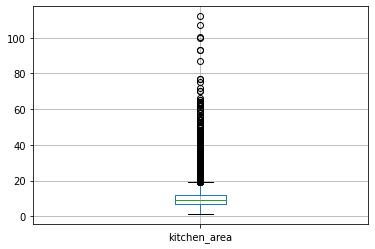

In [52]:
data.boxplot(column=['kitchen_area'])

In [53]:
data['kitchen_area'].describe()

count   23467.000
mean       10.457
std         5.779
min         1.300
25%         7.000
50%         9.000
75%        11.810
max       112.000
Name: kitchen_area, dtype: float64

<AxesSubplot:>

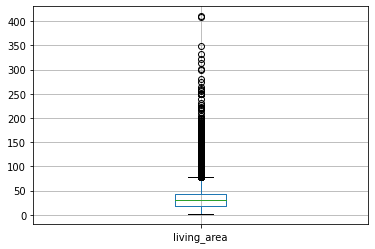

In [54]:
data.boxplot(column=['living_area'])

In [55]:
data['living_area'].describe()

count   23529.000
mean       34.459
std        21.797
min         2.000
25%        18.600
50%        30.000
75%        42.300
max       409.700
Name: living_area, dtype: float64

In [56]:
data['balcony'].describe()

count   23672.000
mean        0.590
std         0.958
min         0.000
25%         0.000
50%         0.000
75%         1.000
max         5.000
Name: balcony, dtype: float64

<AxesSubplot:>

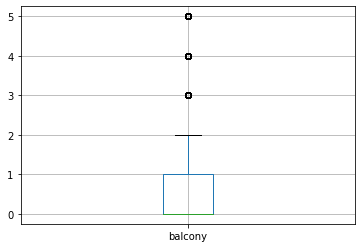

In [57]:
data.boxplot(column=['balcony'])

In [58]:
(1866 / 23672) * 100

7.882730652247381

У некоторых параметров очевидно заметны выбросы, которые было решено устранить. Скорее всего аномально высокие значения являются следствием ошибок при заполнении анкет.  Удалено ~  7. 88 % данных

### Добавляем в таблицу новые столбцы

#### Цена одного квадратного метра

In [59]:
data['square_meter_price'] = data['last_price'] / data['total_area'] # общая цена на общую площадь

In [60]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,square_meter_price
0,20,13000000.000,108.000,2019-03-07,3,2.700,16.000,51.000,8,True,...,0.000,Санкт-Петербург,18863.000,16028.000,1.000,482.000,2.000,755.000,95.000,120370.370
1,7,3350000.000,40.400,2018-12-04,1,2.750,11.000,18.600,1,True,...,2.000,Шушары,12817.000,18603.000,0.000,NaN,0.000,584.500,81.000,82920.792
2,10,5196000.000,56.000,2015-08-20,2,2.550,5.000,34.300,4,True,...,0.000,Санкт-Петербург,21741.000,13933.000,1.000,90.000,2.000,574.000,558.000,92785.714
3,0,64900000.000,159.000,2015-07-24,3,2.600,14.000,95.000,9,True,...,0.000,Санкт-Петербург,28098.000,6800.000,2.000,84.000,3.000,234.000,424.000,408176.101
4,2,10000000.000,100.000,2018-06-19,2,3.030,14.000,32.000,13,True,...,0.000,Санкт-Петербург,31856.000,8098.000,2.000,112.000,1.000,48.000,121.000,100000.000


#### День недели публикации объявления

In [61]:
data['weekday_first_exposition'] = data['first_day_exposition'].dt.weekday

In [62]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,square_meter_price,weekday_first_exposition
0,20,13000000.000,108.000,2019-03-07,3,2.700,16.000,51.000,8,True,...,Санкт-Петербург,18863.000,16028.000,1.000,482.000,2.000,755.000,95.000,120370.370,3
1,7,3350000.000,40.400,2018-12-04,1,2.750,11.000,18.600,1,True,...,Шушары,12817.000,18603.000,0.000,NaN,0.000,584.500,81.000,82920.792,1
2,10,5196000.000,56.000,2015-08-20,2,2.550,5.000,34.300,4,True,...,Санкт-Петербург,21741.000,13933.000,1.000,90.000,2.000,574.000,558.000,92785.714,3
3,0,64900000.000,159.000,2015-07-24,3,2.600,14.000,95.000,9,True,...,Санкт-Петербург,28098.000,6800.000,2.000,84.000,3.000,234.000,424.000,408176.101,4
4,2,10000000.000,100.000,2018-06-19,2,3.030,14.000,32.000,13,True,...,Санкт-Петербург,31856.000,8098.000,2.000,112.000,1.000,48.000,121.000,100000.000,1


#### Месяц публикации объявления;

In [63]:
data['month_first_exposition'] = data['first_day_exposition'].dt.month

In [64]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,square_meter_price,weekday_first_exposition,month_first_exposition
0,20,13000000.000,108.000,2019-03-07,3,2.700,16.000,51.000,8,True,...,18863.000,16028.000,1.000,482.000,2.000,755.000,95.000,120370.370,3,3
1,7,3350000.000,40.400,2018-12-04,1,2.750,11.000,18.600,1,True,...,12817.000,18603.000,0.000,NaN,0.000,584.500,81.000,82920.792,1,12
2,10,5196000.000,56.000,2015-08-20,2,2.550,5.000,34.300,4,True,...,21741.000,13933.000,1.000,90.000,2.000,574.000,558.000,92785.714,3,8
3,0,64900000.000,159.000,2015-07-24,3,2.600,14.000,95.000,9,True,...,28098.000,6800.000,2.000,84.000,3.000,234.000,424.000,408176.101,4,7
4,2,10000000.000,100.000,2018-06-19,2,3.030,14.000,32.000,13,True,...,31856.000,8098.000,2.000,112.000,1.000,48.000,121.000,100000.000,1,6


#### Месяц публикации объявления

In [65]:
data['year_first_exposition'] = data['first_day_exposition'].dt.year

In [66]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,square_meter_price,weekday_first_exposition,month_first_exposition,year_first_exposition
0,20,13000000.000,108.000,2019-03-07,3,2.700,16.000,51.000,8,True,...,16028.000,1.000,482.000,2.000,755.000,95.000,120370.370,3,3,2019
1,7,3350000.000,40.400,2018-12-04,1,2.750,11.000,18.600,1,True,...,18603.000,0.000,NaN,0.000,584.500,81.000,82920.792,1,12,2018
2,10,5196000.000,56.000,2015-08-20,2,2.550,5.000,34.300,4,True,...,13933.000,1.000,90.000,2.000,574.000,558.000,92785.714,3,8,2015
3,0,64900000.000,159.000,2015-07-24,3,2.600,14.000,95.000,9,True,...,6800.000,2.000,84.000,3.000,234.000,424.000,408176.101,4,7,2015
4,2,10000000.000,100.000,2018-06-19,2,3.030,14.000,32.000,13,True,...,8098.000,2.000,112.000,1.000,48.000,121.000,100000.000,1,6,2018


#### Тип этажа квартиры

####  Исключим 75 строк с пустыми floors_total

In [67]:
data = data[data['floors_total'].notna()]

In [68]:
data.isnull().sum()

total_images                   0
last_price                     0
total_area                     0
first_day_exposition           0
rooms                          0
ceiling_height                 1
floors_total                   0
living_area                  133
floor                          0
is_apartment                   0
studio                         0
open_plan                      0
kitchen_area                 185
balcony                        0
locality_name                  0
airports_nearest            4816
city_centers_nearest        4816
parks_around_3000           4816
parks_nearest               5977
ponds_around_3000           4816
ponds_nearest               4924
days_exposition               80
square_meter_price             0
weekday_first_exposition       0
month_first_exposition         0
year_first_exposition          0
dtype: int64

#### Создадим функцию floor_type для категоризации этажей

In [69]:
def floor_type(x):
    if x['floor'] == x['floors_total']:
        return 'последний'
    elif x['floor'] == 1:
        return 'первый'
    else:
        return 'другой'
        

In [70]:
data['floor_type'] = data.apply(floor_type, axis=1)

In [71]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,square_meter_price,weekday_first_exposition,month_first_exposition,year_first_exposition,floor_type
0,20,13000000.000,108.000,2019-03-07,3,2.700,16.000,51.000,8,True,...,1.000,482.000,2.000,755.000,95.000,120370.370,3,3,2019,другой
1,7,3350000.000,40.400,2018-12-04,1,2.750,11.000,18.600,1,True,...,0.000,NaN,0.000,584.500,81.000,82920.792,1,12,2018,первый
2,10,5196000.000,56.000,2015-08-20,2,2.550,5.000,34.300,4,True,...,1.000,90.000,2.000,574.000,558.000,92785.714,3,8,2015,другой
3,0,64900000.000,159.000,2015-07-24,3,2.600,14.000,95.000,9,True,...,2.000,84.000,3.000,234.000,424.000,408176.101,4,7,2015,другой
4,2,10000000.000,100.000,2018-06-19,2,3.030,14.000,32.000,13,True,...,2.000,112.000,1.000,48.000,121.000,100000.000,1,6,2018,другой


#### Расстояние до центра города в километрах

#### Попробуем заполнить city_center_nearest медианами по населенным пунктам

In [72]:
 data['city_centers_nearest'] = data['city_centers_nearest'].fillna(data.groupby('locality_name')['city_centers_nearest'].transform('median'))

In [73]:
data.isnull().sum()

total_images                   0
last_price                     0
total_area                     0
first_day_exposition           0
rooms                          0
ceiling_height                 1
floors_total                   0
living_area                  133
floor                          0
is_apartment                   0
studio                         0
open_plan                      0
kitchen_area                 185
balcony                        0
locality_name                  0
airports_nearest            4816
city_centers_nearest        4816
parks_around_3000           4816
parks_nearest               5977
ponds_around_3000           4816
ponds_nearest               4924
days_exposition               80
square_meter_price             0
weekday_first_exposition       0
month_first_exposition         0
year_first_exposition          0
floor_type                     0
dtype: int64

In [74]:
data['city_centers_nearest'] = data['city_centers_nearest'].fillna(0) # заполним оставшиеся значения 0

In [75]:
data['city_centers_nearest_km'] = data['city_centers_nearest'] / 1000

In [76]:
### Обычное применение round и astype('Int64') не сработало. Хотелось бы знать почему?
decimals = 0    
data['city_centers_nearest_km'] = data['city_centers_nearest_km'].apply(lambda x: round(x, decimals))


In [77]:
data['city_centers_nearest_km'] = data['city_centers_nearest_km'].astype('Int64')

In [78]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,square_meter_price,weekday_first_exposition,month_first_exposition,year_first_exposition,floor_type,city_centers_nearest_km
0,20,13000000.000,108.000,2019-03-07,3,2.700,16.000,51.000,8,True,...,482.000,2.000,755.000,95.000,120370.370,3,3,2019,другой,16
1,7,3350000.000,40.400,2018-12-04,1,2.750,11.000,18.600,1,True,...,NaN,0.000,584.500,81.000,82920.792,1,12,2018,первый,19
2,10,5196000.000,56.000,2015-08-20,2,2.550,5.000,34.300,4,True,...,90.000,2.000,574.000,558.000,92785.714,3,8,2015,другой,14
3,0,64900000.000,159.000,2015-07-24,3,2.600,14.000,95.000,9,True,...,84.000,3.000,234.000,424.000,408176.101,4,7,2015,другой,7
4,2,10000000.000,100.000,2018-06-19,2,3.030,14.000,32.000,13,True,...,112.000,1.000,48.000,121.000,100000.000,1,6,2018,другой,8


### Исследовательский анализ данных 

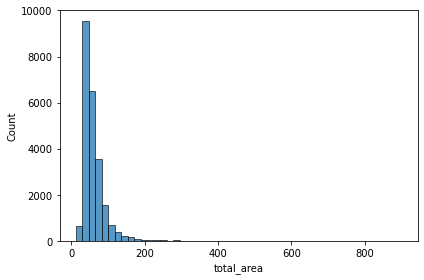

In [79]:

sns.histplot(data['total_area'], bins=50)
plt.tight_layout()

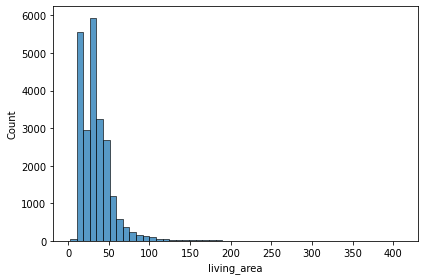

In [80]:
sns.histplot(data['living_area'], bins=50)
plt.tight_layout()

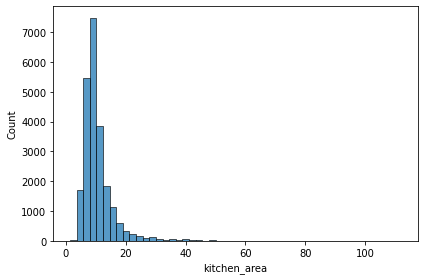

In [81]:
sns.histplot(data['kitchen_area'], bins=50)
plt.tight_layout()

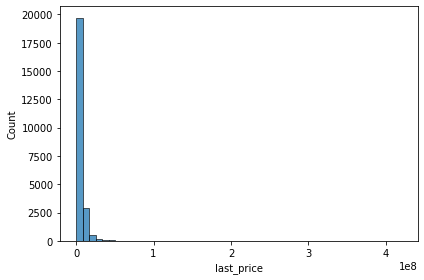

In [82]:
sns.histplot(data['last_price'], bins=50)
plt.tight_layout()

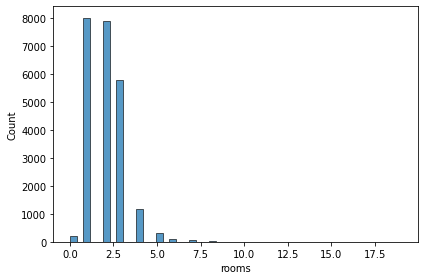

In [83]:
sns.histplot(data['rooms'], bins=50)
plt.tight_layout()

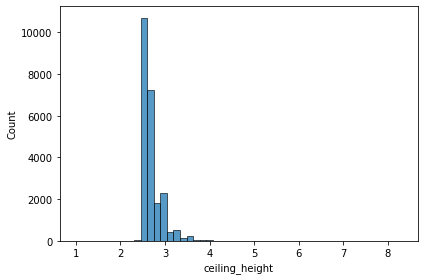

In [84]:
sns.histplot(data['ceiling_height'], bins=50)
plt.tight_layout()

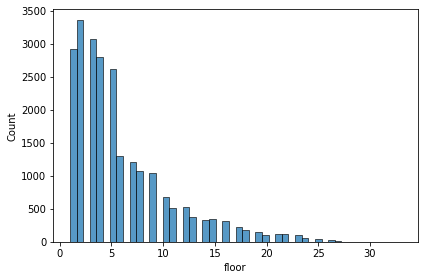

In [85]:
sns.histplot(data['floor'], bins=50)
plt.tight_layout()

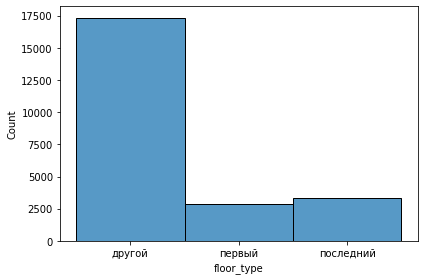

In [86]:
sns.histplot(data['floor_type'], bins=50)
plt.tight_layout()

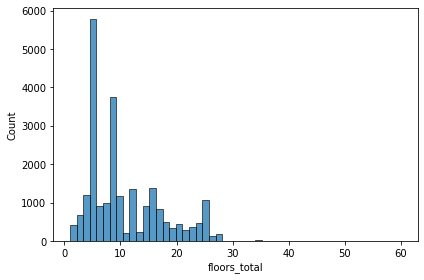

In [87]:
sns.histplot(data['floors_total'], bins=50)
plt.tight_layout()

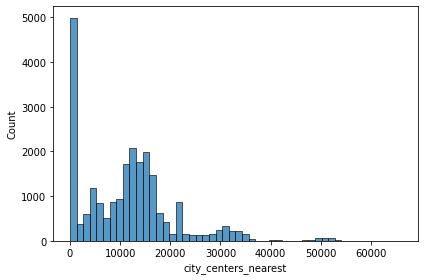

In [88]:
sns.histplot(data['city_centers_nearest'], bins=50)
plt.tight_layout()

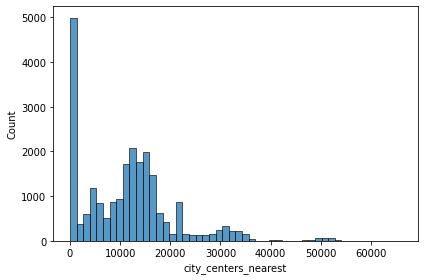

In [89]:
sns.histplot(data['city_centers_nearest'], bins=50)
plt.tight_layout()

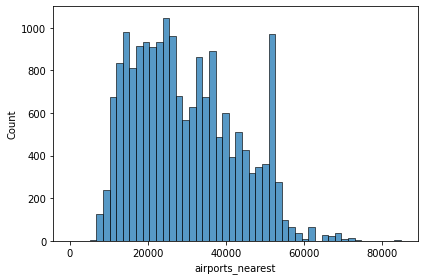

In [90]:
sns.histplot(data['airports_nearest'], bins=50)
plt.tight_layout()

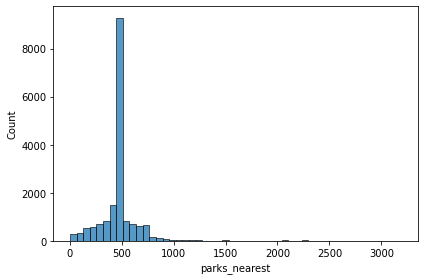

In [91]:
sns.histplot(data['parks_nearest'], bins=50)
plt.tight_layout()

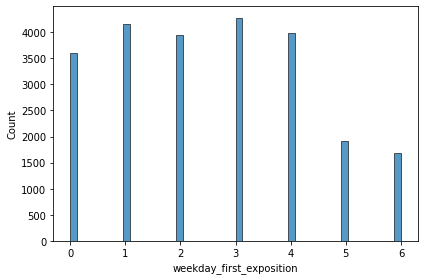

In [92]:
sns.histplot(data['weekday_first_exposition'], bins=50)
plt.tight_layout()

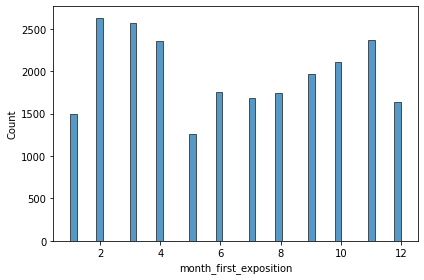

In [93]:
sns.histplot(data['month_first_exposition'], bins=50)
plt.tight_layout()

**Тенденции**
- Из полученых данных можно сделать вывод,что чаще всего продают квартиры среднего размера, как по площади, так и по количеству комнат. Логично предположить, что чаще всего квартиры продают (возможно, с целью обмена) люди среднего достатка. Большинство продающихся увартир не находятся на первых и последних этажах,возможгл, потому-что такие квартиры проще продать. 
- Большинство объявлений подается в будние дни. Всплеск подачи объявлений в начале года возможно связан с общим желанием начать год с чего-то нового.
- Боььшинство квартир расположены относительно близко к центру и одинаково близко от аэропортоа и парков.

#### Как быстро продавались квартиры

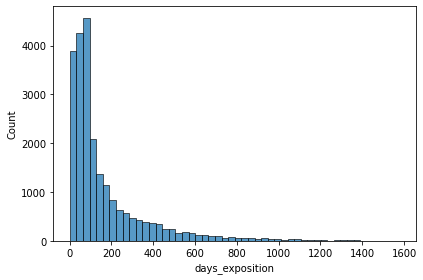

In [94]:
sns.histplot(data['days_exposition'], bins=50)
plt.tight_layout()

In [95]:
data['days_exposition'].median() #Медиана

95.0

In [96]:
data['days_exposition'].mean() # Среднее

170.38056240959756

In [97]:
data['days_exposition'].describe()

count   23506.000
mean      170.381
std       207.233
min         1.000
25%        45.000
50%        95.000
75%       201.000
max      1580.000
Name: days_exposition, dtype: float64

**Выводы**

По медиане квартиры продаются в первые 100. Нахождение объявления в базе больше 200 дней уже можно считать достаточно долгим. Однако иногдда удается продать квартиру в промежуток чуть больше месяца. 

#### Зависимость цены от других факторов

In [98]:
price_rel = data.pivot_table(index='locality_name', values=['last_price', 'total_area', 'living_area', 'kitchen_area', 'rooms', 'floor_type', 'weekday_first_exposition', 'month_first_exposition', 'year_first_exposition'])



In [99]:
price_rel.corr()

,kitchen_area,last_price,living_area,month_first_exposition,rooms,total_area,weekday_first_exposition,year_first_exposition
kitchen_area,1.000,0.561,0.385,-0.061,0.191,0.629,0.038,0.002
last_price,0.561,1.000,0.516,-0.038,0.242,0.616,-0.057,-0.120
living_area,0.385,0.516,1.000,-0.023,0.789,0.941,0.025,-0.060
month_first_exposition,-0.061,-0.038,-0.023,1.000,-0.009,-0.044,0.013,-0.365
rooms,0.191,0.242,0.789,-0.009,1.000,0.727,0.078,-0.042
total_area,0.629,0.616,0.941,-0.044,0.727,1.000,0.017,-0.034
weekday_first_exposition,0.038,-0.057,0.025,0.013,0.078,0.017,1.000,-0.044
year_first_exposition,0.002,-0.120,-0.060,-0.365,-0.042,-0.034,-0.044,1.000


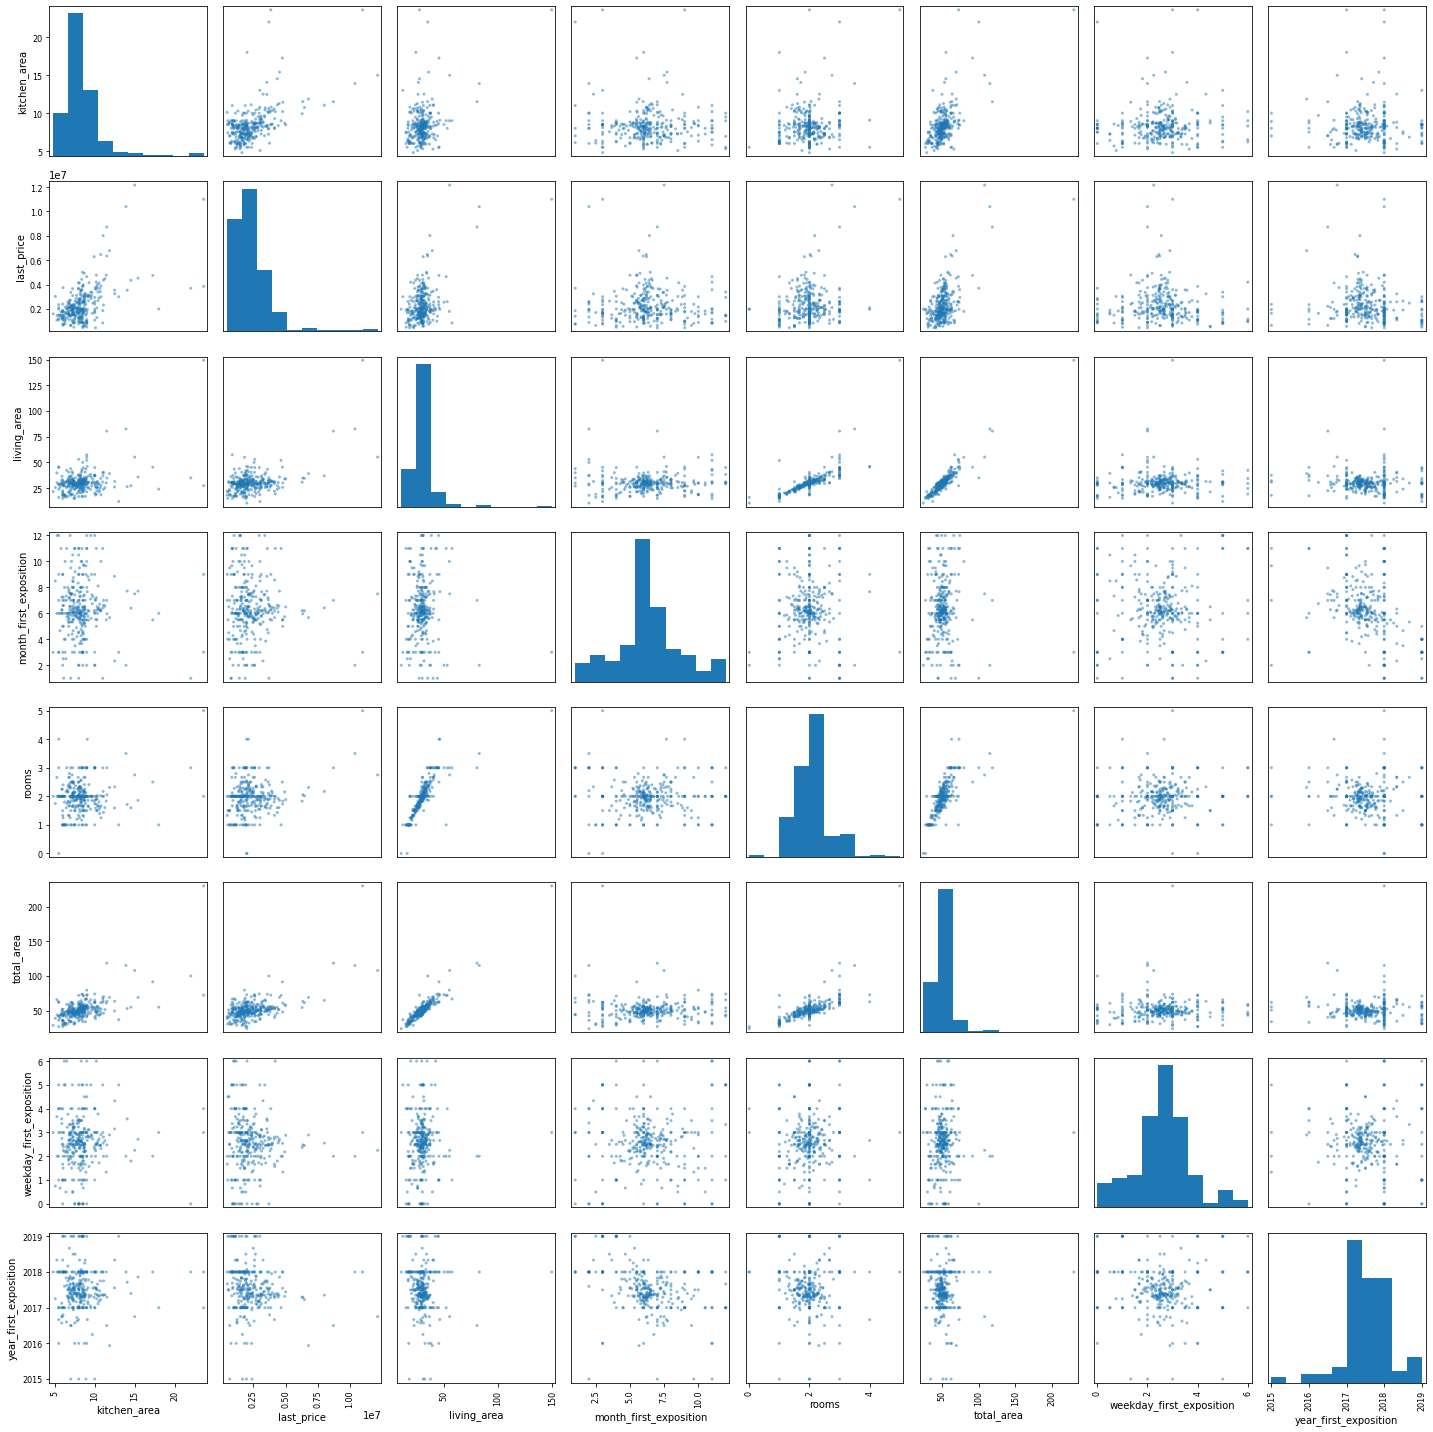

In [100]:
pd.plotting.scatter_matrix(price_rel, figsize=(20, 20))
plt.tight_layout()

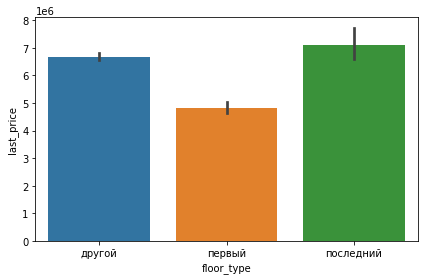

In [101]:
sns.barplot(x=data['floor_type'], y=data['last_price'])
plt.tight_layout()

**Выводы**
Общая площадь квартиры юольше всего влияет на ее цену (0.629 по коэфиценту Пирсона) За ней следует площадь кухни (0.561) и площадь жилых помещений(0.516) Само количество комнат, что интересно влияет меньше (0.242). Дешевле всего квартиры на первом этаже. Цены на последних этажах обычно выше. Учтенные времяные параметры не указывают высокого влияния на цену. С наибольшим влиянием от года. (-0.120)  Возможно это связано с изменениями в общей экономической ситуацией.

#### Средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

In [102]:
top_ad = data.pivot_table(index='locality_name', values='square_meter_price', aggfunc=['mean', 'count'])

In [103]:
top_ad.columns = ['mean', 'count']

In [104]:
top_ad.sort_values(by=['count', 'mean'], ascending=False).head(10)

,mean,count
locality_name,,
Санкт-Петербург,114733.325,15634
Мурино,86018.111,584
Кудрово,95260.846,470
Шушары,78551.345,439
Всеволожск,68654.474,398
Пушкин,103125.819,369
Колпино,75424.579,338
Парголово,90175.913,327
Гатчина,68757.679,306


**Вывод**

Самый дорогой квадратный метр в Санкт-Петербурге. Самый дещевый в Выборге.

#### Стоимость объектов в Санкт-Петербурге

In [105]:
data_spb = data.query("locality_name == 'Санкт-Петербург'")

In [106]:
spb_km_price = data_spb.pivot_table(index='city_centers_nearest_km', values='last_price', aggfunc='mean').sort_values(by='last_price', ascending=False)

In [107]:
spb_km_price

,last_price
city_centers_nearest_km,
0,31449115.852
1,21206720.828
2,17788319.613
6,15338418.387
7,14775152.586
5,14455995.621
4,12216246.816
3,11146436.170
8,9961374.213


**Вывод**
В основном чем ближе к центру тем дороже квартиры. И эта закономерность соблюдается почти прямо,но в топ-10 входит 27 киллометр.

### Общий вывод

В ходе исследования была произведена очистка датасета. Поля были приобразованы в более подходящие для работы форматы. Добавлены новые необходимые для исследования колонки и произведена визуализация параметров важных для иследования. 

**Общие тенденции**

- Цены на квартиры зависят от вполне очевидных параметров таких, как размер жилой площади, этаж квартиры и приблеженность к центру. Как к центру страны так и центру города.
- В больших городах  подается больше объявлений.
- Квартиры приблеженные к центру СПБ дороже.

**Общие рекомендации**

Совершенно не удивительно, что желая сэкономить на покупке недвижимости имеет смысл приобретать жилье поменьше и подальше от центров крупных городов.